# **Importing libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/mymoviedb.csv.zip", lineterminator="\n")
df=pd.DataFrame(data)


In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [ ]:
df.shape

(9827, 9)

In [ ]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Removing Day and Month from Release_Date

In [ ]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [ ]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns


In [ ]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

# dropping columns and confirming changes
# Added errors='ignore' to prevent KeyError if columns are already dropped
df.drop(cols, axis = 1, inplace = True, errors='ignore')
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [ ]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column based on labels and edges
# Corrected the function name from 'catigorize_col' to 'categorize_col'
# categorize_col(df, 'Vote_Average', labels) # This line was moved below the function definition

# confirming changes
# df['Vote_Average'].unique() # This line was moved below the function definition

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorized Vote_Average column

We should cut the Vote_Average values and make 4 categories popular, average , below_avg, not_popular to describe it more using categorize_col() function provided above

In [ ]:
def categorize_col(df, col, labels):

  edges=[df[col].describe()['min'],
         df[col].describe()['25%'],
         df[col].describe()['50%'],
         df[col].describe()['75%'],
         df[col].describe()['max']]

  df[col]=pd.cut(df[col],bins=edges,labels=labels,duplicates='drop')
  return df

In [ ]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

# dropping columns and confirming changes
# Added errors='ignore' to prevent KeyError if columns are already dropped
df.drop(cols, axis = 1, inplace = True, errors='ignore')
df.columns

# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# Define the categorization function
def categorize_col(df, col, labels):
  # Check if the column is numeric before describing
  if pd.api.types.is_numeric_dtype(df[col]):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

    # Use closed='right' to include the max value in the last bin
    df[col]=pd.cut(df[col],bins=edges,labels=labels,duplicates='drop', include_lowest=True, right=True)
  else:
    print(f"Column '{col}' is not numeric. Cannot categorize.")
  return df

# categorize column based on labels and edges

# Ensure this is called on the numeric column before it's converted
categorize_col(df, 'Vote_Average', labels)

# confirming changes
print(df['Vote_Average'].unique())

print(df.head())

print(df['Vote_Average'].value_counts())

df.dropna(inplace=True)
print(df.isna().sum())

print(df.head())

# **We split genres into a list and then explode our dataframe to have only one genre per row for each movie**

df = df.dropna(subset=['Genre'])
df['Genre'] = df['Genre'].str.split(', ')

# Explode the 'Genre' column to create a new row for each genre

df= df.explode('Genre').reset_index(drop=True)
print(df.head())



['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']
   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below_avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War  
Vote_Average
not_popular    2567
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64
Release_Date    0
Title  

In [ ]:
#Casting Column into Category

df['Genre']=df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [ ]:
df.nunique()

,0
Release_Date,102
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,19


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Exploration Summary

1. We have dataframe consisting of 9872 rows and 9 colums.
2. Our dataset looks a bit tidy with no Null nor duplicated values.
3. Release_Date column needs to be casted into date time and to extract only the year value.
4. Overview,Original_Language and Poster_Url wouldn't to be useful during analysis,so we will drop them.
5. there is noticable outliers in popularity column.
6. Vote_Average better be categorised for proper analysis.
7. Genre column has comma separated values and white spaces that need to be handled and casted into category.




Data Visualization

In [ ]:
sns.set_style('whitegrid')

## 2. **What is the most frequent genre of movies release on Netflix ?**

In [ ]:
df['Genre'].describe()

,Genre
count,25793
unique,19
top,Drama
freq,3744


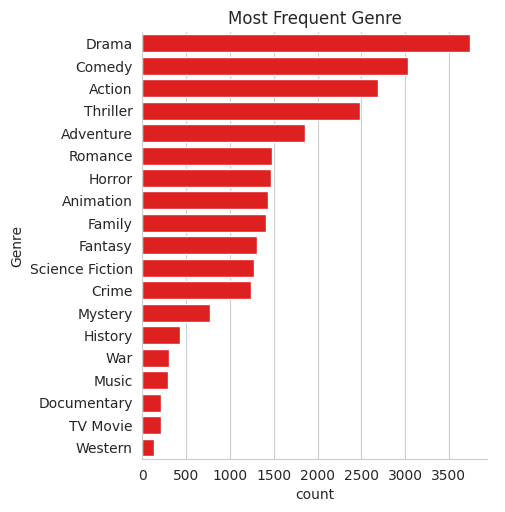

In [ ]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='red')
plt.title('Most Frequent Genre')
plt.show()

## 2. **Which has highest votes in vote avg column ?**

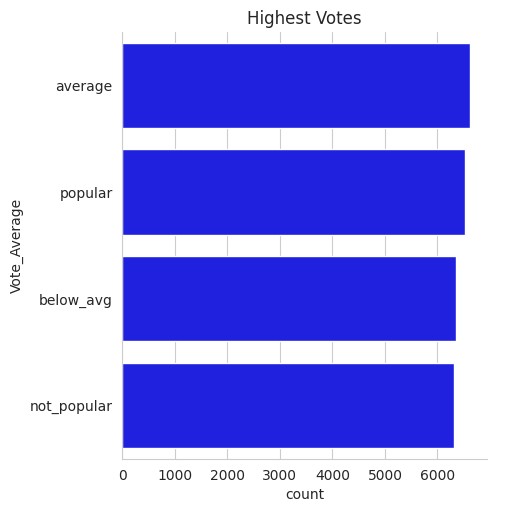

In [ ]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='blue')
plt.title('Highest Votes')
plt.show()


### **3. What movie got the highest popularity ? What's its genre ?**

In [ ]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# **4. What movie got the lowest popularity ? What's its genre?**

In [ ]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


# 5. **Which year has the most filmmed movies ?**

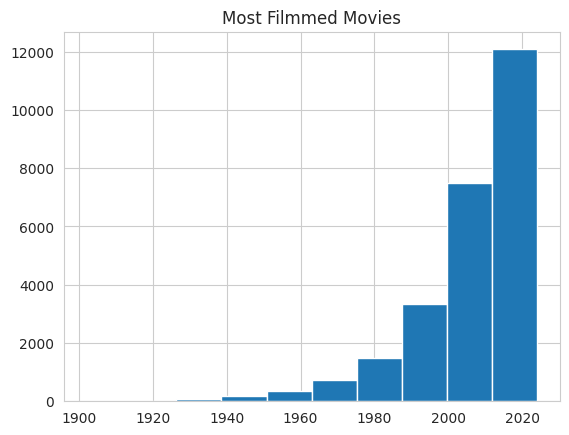

In [ ]:
df['Release_Date'].hist()
plt.title('Most Filmmed Movies')
plt.show()